In [1]:
from spectra_analysis import *
import pandas as pd

In [2]:

# Corrected file path with forward slashes
file_path_c = 'D:\James_archive\OneDrive\On_Going\VASSCAA_submission\Paper draft\data copy\Comp_1.pkl'

# Read the pickle file
df_c = pd.read_pickle(file_path_c)


In [3]:
df_c

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249
wavelength (nm),,,,,,,,,,,,,,,,,,,,,
195.000000,51.599701,-33.346680,-5.306389,-8.598440,15.741540,21.398479,53.658298,-14.015270,0.954180,-18.596991,...,-6.677596,-19.297371,-41.463081,-19.765270,51.687160,58.060261,25.497299,-53.267830,5.405260,2.799059
195.199997,12.857200,-33.942799,-2.405837,5.221527,-16.540899,11.458310,13.375990,-23.019859,-27.156179,-4.295376,...,-29.851641,-29.377050,-58.237659,-0.935815,47.945210,48.297958,2.264387,-75.871078,-13.577520,-10.474010
195.399994,-1.773250,-19.152349,5.547466,-4.843350,-21.722830,2.206845,-0.264530,-18.703180,-38.270988,-3.774217,...,-25.264530,-35.061432,-45.631451,9.102700,29.625860,23.262529,-7.317553,-53.130619,-0.866092,-16.806629
195.600006,-6.760002,1.792008,15.520970,-24.457911,-16.071180,-6.769308,-3.256581,-9.062128,-42.592838,-8.760968,...,-9.971829,-39.050831,-21.695040,15.751700,5.689455,-7.655333,-11.639400,-12.904160,24.067671,-20.463579
195.800003,-11.448630,21.831711,25.340160,-43.475761,-10.398930,-14.767680,-5.836774,0.321525,-46.564610,-13.531500,...,5.421585,-41.843201,1.536612,22.333570,-17.641790,-36.744530,-15.176750,25.207979,47.815620,-23.650351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104.000000,-91.482063,-87.547119,-92.077454,-93.227547,-113.159103,-85.045120,-55.305080,-69.991638,-137.966003,-88.169548,...,-33.717812,-68.791183,-58.815868,-123.006599,-114.756599,-99.919540,-94.552322,-126.815903,-56.797890,-34.880100
1104.199951,-89.081459,-68.330307,-86.234322,-95.797112,-131.765900,-51.623138,-54.124840,-61.540489,-143.162994,-79.831360,...,-37.001530,-79.340408,-59.254669,-123.791496,-113.239502,-108.013000,-113.187698,-128.341797,-33.556850,-1.727937
1104.400024,-52.439919,-66.784866,-103.585800,-56.118778,-92.939133,-72.044029,-43.832352,-53.364891,-127.374802,-52.992111,...,-63.712410,-48.548710,-31.305571,-74.140106,-64.319283,-83.862831,-86.901741,-106.440903,-35.946079,-18.182680


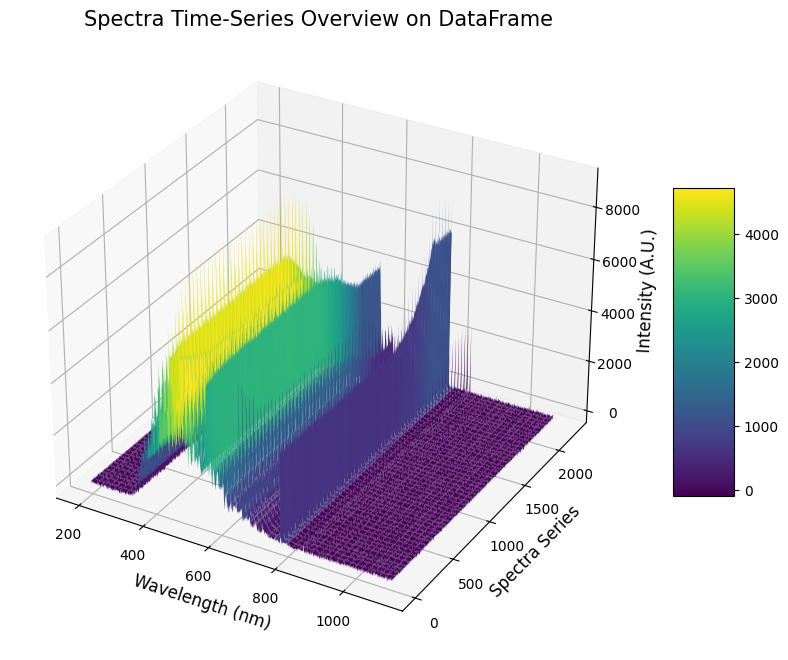

In [4]:
multi_overview(df_c)

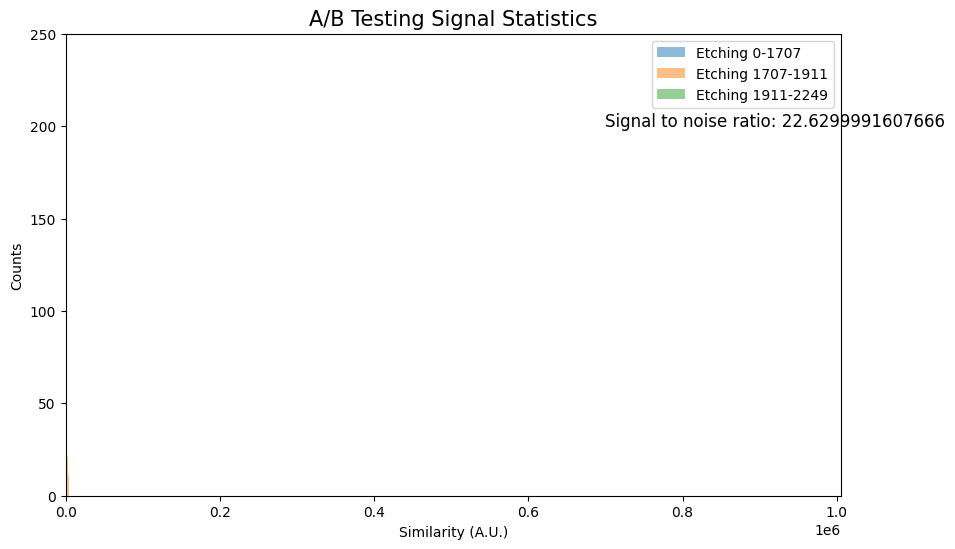

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def average_neighbors(df, target_wavelength, num_neighbors=1):
    """
    Average the intensity values of the target wavelength and its neighboring rows.

    Parameters:
    df (pandas DataFrame): The dataset with wavelengths as rows and time steps as columns.
    target_wavelength (float): The target wavelength to average neighboring rows.
    num_neighbors (int): Number of neighboring rows to average on either side of the target wavelength.

    Returns:
    pandas Series: The averaged intensity values for the wavelength and its neighbors.
    """
    # Find the closest index for the target wavelength
    closest_idx = (pd.Series(df.index) - target_wavelength).abs().idxmin()
    
    # Average the neighboring rows, including the target wavelength
    start_idx = max(0, closest_idx - num_neighbors)
    end_idx = min(len(df), closest_idx + num_neighbors + 1)  # +1 to include the end index
    
    # Return the average of the neighboring rows
    return df.iloc[start_idx:end_idx].mean()

def create_dff_trace(df, wavelengths, num_neighbors=1):
    """
    Create a DataFrame (dff_trace) based on the input wavelengths, averaging their neighboring rows.

    Parameters:
    df (pandas DataFrame): The dataset with wavelengths as rows and time steps as columns.
    wavelengths (list): List of target wavelengths to average neighbors for.
    num_neighbors (int): Number of neighboring rows to average on either side of each target wavelength.
    
    Returns:
    pandas DataFrame: DataFrame containing the averaged intensities for the given wavelengths.
    """
    averaged_data = pd.DataFrame()

    # Average neighboring values for each wavelength
    for wavelength in wavelengths:
        averaged_wavelength_values = average_neighbors(df, wavelength, num_neighbors)
        averaged_data[f'{wavelength}_averaged'] = averaged_wavelength_values  # Create a column for each averaged wavelength
    
    # Create the trace DataFrame by averaging all wavelengths together
    dff_trace = averaged_data.mean(axis=1).to_frame(name='diff')
    
    return dff_trace

def plot_etching_comparison(dff_trace, time_steps):
    """
    Plot the etching process and A/B testing signal statistics for dynamically created time ranges.

    Parameters:
    dff_trace (pandas DataFrame): DataFrame containing the trace to plot.
    time_steps (list): List of time step indices defining the ranges to compare.
    
    Returns:
    None: Plots scatter and histogram visualizations.
    """
    # Check for any NaN or infinite values in dff_trace
    if dff_trace.isnull().values.any() or np.isinf(dff_trace.values).any():
        raise ValueError("dff_trace contains NaN or infinite values. Please clean the data.")
    
    # Create time ranges based on the provided time steps
    etch_ranges = [(time_steps[i], time_steps[i+1]) for i in range(len(time_steps)-1)]
    
    # Create histograms for each range
    fig, ax = plt.subplots(figsize=(10, 6))  # Only one plot, so no need for an array of axes
    
    # Create overlapping histograms for each range
    for start, end in etch_ranges:
        etch = dff_trace['diff'].iloc[start:end]
        ax.hist(etch, alpha=0.5, label=f'Etching {start}-{end}')

    # Set reasonable plot limits if needed (check for extreme values)
    ax.set_xlim(0, np.nanmax(dff_trace['diff']) + 1e6)  # Adjust x-axis limits based on data
    ax.set_ylim(0, 250)  # Adjust y-axis limits based on typical histogram counts

    # Text to display signal-to-noise ratio for the first range
    etch = dff_trace['diff'].iloc[etch_ranges[0][0]:etch_ranges[0][1]]
    ax.text(0.7e+06, 200, f'Signal to noise ratio: {np.round(np.mean(etch) / np.std(etch), 2)}', fontsize=12)
    
    # Set the histogram plot labels and title
    ax.legend()
    ax.set_xlabel('Similarity (A.U.)')
    ax.set_ylabel('Counts')
    ax.set_title(f'A/B Testing Signal Statistics', fontsize=15)
    
    plt.show()

# Example usage
# Assuming `df_c` is your original dataset (wavelength x time series matrix)
time_steps = [0, 1707, 1911, 2249]  # Example time steps
wavelengths = [394.6, 404.6, 418.8, 434.2, 450.6, 476.4, 482.8, 507.6]  # Example wavelength positions

# Create the dff_trace from the input data
dff_trace = create_dff_trace(df_c, wavelengths, num_neighbors=5)

# Call the function to plot the comparison using time steps
plot_etching_comparison(dff_trace, time_steps)




In [6]:
dff_trace=create_dff_trace(df_c, wavelengths,num_neighbors=10)
dff_trace

,diff
0,4237.553223
1,4274.838867
2,4264.719238
3,4271.435547
4,4289.425781
...,...
2245,657.144348
2246,651.317566
2247,619.582520
2248,656.835388


## Label the ground truth

In [7]:
import pandas as pd
import numpy as np

def label_etching_data(data, etching_threshold=2000):
    """
    Label time steps in the dataset based on the etching threshold.
    
    Parameters:
    data (pandas DataFrame): The input data with wavelengths as rows and time steps as columns.
    etching_threshold (int): The time step after which etching has ended.
    
    Returns:
    pandas DataFrame: The input data with an additional row for labels.
    """
    # Initialize the labels array with 0s (etching ongoing)
    labels = np.zeros(data.shape[1])
    
    # Set labels to 1 (etching ended) for time steps after the etching threshold
    labels[etching_threshold:] = 1
    
    # Create a new DataFrame to store the labels alongside the original data
    labeled_data = data.copy()
    labeled_data.loc['label'] = labels
    
    return labeled_data

# Example usage:
# Assuming `df` is your original dataset (with wavelengths as rows and time steps as columns)
etching_threshold = 2000  # Time step after which etching has ended
labeled_data = label_etching_data(df_c, etching_threshold)

# View the labeled data
print(labeled_data)


                      0          1           2          3           4     \
wavelength (nm)                                                            
195.0            51.599701 -33.346680   -5.306389  -8.598440   15.741540   
195.199997       12.857200 -33.942799   -2.405837   5.221527  -16.540899   
195.399994       -1.773250 -19.152349    5.547466  -4.843350  -21.722830   
195.600006       -6.760002   1.792008   15.520970 -24.457911  -16.071180   
195.800003      -11.448630  21.831711   25.340160 -43.475761  -10.398930   
...                    ...        ...         ...        ...         ...   
1104.199951     -89.081459 -68.330307  -86.234322 -95.797112 -131.765900   
1104.400024     -52.439919 -66.784866 -103.585800 -56.118778  -92.939133   
1104.599976     -11.369990 -67.524872 -123.935799 -10.978860  -46.689209   
1104.800049      -1.347395 -54.510860 -130.801697  -7.381258  -23.868389   
label             0.000000   0.000000    0.000000   0.000000    0.000000   

           